# A1 - Predicting Car Prices

### Project plan:<br>
1. Load data <br>
    a. Load data from CSV file and inspect file format and content in high level <br>
    b. Cleanup and encoding<br>
    <br>
2. Exploratory Data Analysis<br>
    a. Check class imbalance<br>
    b. Distribution plot<br>
    <br>
3 & 4 . Feature Engineering and Preprocessing
     3. Feature engineering<br>
        a. Dimensionality reduction<br>
        b. feature splitting<br>
        c. creating features<br>
    <br>
    4. Preprocessing<br>
        a. Null values<br>
        b. Outliers<br>
        c. Fix class imbalance<br>
        d. Typos/Entry errors/Duplicates/IDs<br>
    <br>
5. Feature selection<br>
    a. select x features<br>
    b. select y target<br>
    <br>

6. Model selection<br>
    a. Regresssion<br>
    <br>
7. Testing <br>
    a. Regression (r2, MSE)<br>
    <br>
8. Analysis<br>
    a. Analyse model - feature importance<br>
    <br>
9. Inference<br>
    a. Apply your best model on soem unseen data and see whether it makes sense<br>
    <br>
10. Deployment<br>
    a. Docker / Plotly <br>
    <br>


## 0. Setup / Import Libs

In [ ]:
# core data handling libraries
## dataframes for structured data
import pandas as pd
## numerical computing, arrays, linear algebra
import numpy as np

## Statistical data visualization (built on Matplotlib)
import seaborn as sns
import matplotlib.pyplot as plt

# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

# Data file path
data_path = '../data/Cars.csv'



## 1. Load Data

In [2]:
df = pd.read_csv(data_path)
len(df)

FileNotFoundError: [Errno 2] No such file or directory: 'data/Cars.csv'

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.shape

(8128, 13)

In [ ]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [ ]:
df.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

• For the feature owner, map First owner to 1, ..., Test Drive Car to 5

In [ ]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [ ]:
owner_encoding = {
    "First Owner": 1,
    "Second Owner": 2,
    "Third Owner": 3,
    "Fourth & Above Owner": 4,
    "Test Drive Car": 5
}

In [ ]:
df['owner_num'] = df['owner'].replace(owner_encoding)
df[['owner', 'owner_num']].head(10)

,owner,owner_num
0,First Owner,1
1,Second Owner,2
2,Third Owner,3
3,First Owner,1
4,First Owner,1
5,First Owner,1
6,First Owner,1
7,Second Owner,2
8,First Owner,1
9,First Owner,1


• For the feature fuel, remove all rows with CNG and LPG because CNG and LPG use a different mileage system i.e., km/kg which is different from kmfeaturepl for Diesel and Petrol

In [ ]:
df['fuel'].unique()


array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [ ]:
# count() = total rows
# sum() = matching rows (CNG or LPG)
(df['fuel'].isin(['CNG', 'LPG'])).sum()

np.int64(95)

In [ ]:
#Expected new count : 8128 - 95 = 8033 
df = df[~df['fuel'].isin(['CNG', 'LPG'])]
print(df['fuel'].count())

8033


In [ ]:
# unique values in fuel column after removing CNG and LPG
df['fuel'].unique()

array(['Diesel', 'Petrol'], dtype=object)

• For the feature mileage, remove “kmpl” and convert the column to numerical type (e.g., float).
Hint: use df.mileage.str.split

In [ ]:
# Remove 'kmpl' and convert mileage to float
df['mileage_num'] = df['mileage'].str.split().str[0].astype(float)
df[['mileage', 'mileage_num']].head()

,mileage,mileage_num
0,23.4 kmpl,23.40
1,21.14 kmpl,21.14
2,17.7 kmpl,17.70
3,23.0 kmpl,23.00
4,16.1 kmpl,16.10


• For the feature engine, remove “CC” and convert the column to numerical type (e.g., float)

In [ ]:
df['engine_num'] = df['engine'].str.split().str[0].astype(float)
df[['engine_num', 'engine']].head()

,engine_num,engine
0,1248.0,1248 CC
1,1498.0,1498 CC
2,1497.0,1497 CC
3,1396.0,1396 CC
4,1298.0,1298 CC


• Do the same for max power

In [ ]:
df['max_power_num'] = df['max_power'].str.split().str[0].astype(float)
df[['max_power_num', 'max_power']].head()

,max_power_num,max_power
0,74.00,74 bhp
1,103.52,103.52 bhp
2,78.00,78 bhp
3,90.00,90 bhp
4,88.20,88.2 bhp


• For the feature brand, take only the first word and remove the rest

In [ ]:
df['brand'] = df['name'].str.split().str[0]
df[['name', 'brand']].head()

,name,brand
0,Maruti Swift Dzire VDI,Maruti
1,Skoda Rapid 1.5 TDI Ambition,Skoda
2,Honda City 2017-2020 EXi,Honda
3,Hyundai i20 Sportz Diesel,Hyundai
4,Maruti Swift VXI BSIII,Maruti


• Drop the feature torque, simply because Chaky’s company does not understand well about it
• You will found out that Test Drive Cars are ridiculously expensive. Since we do not want to
involve this, we will simply delete all samples related to it

In [ ]:
# number of cars with 'Test Drive Car' as owner
(df['owner_num'] == owner_encoding['Test Drive Car']).sum()

np.int64(5)

In [ ]:
# expected new count : 8033 - 5 = 8028
df = df[df['owner_num'] != owner_encoding['Test Drive Car']]
print(df['owner_num'].count())

8028


In [ ]:
df.describe()

,year,selling_price,km_driven,seats,owner_num,mileage_num,engine_num,max_power_num
count,8028.000000,8.028000e+03,8.028000e+03,7814.000000,8028.000000,7814.000000,7814.000000,7820.000000
mean,2013.815521,6.403937e+05,6.977314e+04,5.421551,1.458022,19.391962,1462.914640,91.819726
std,4.030836,8.027015e+05,5.664419e+04,0.963125,0.715283,4.001972,504.759742,35.804513
min,1983.000000,2.999900e+04,1.000000e+03,2.000000,1.000000,0.000000,624.000000,0.000000
25%,2011.000000,2.600000e+05,3.500000e+04,5.000000,1.000000,16.780000,1197.000000,68.850000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000,1.000000,19.300000,1248.000000,82.400000
75%,2017.000000,6.800000e+05,9.800000e+04,5.000000,2.000000,22.320000,1582.000000,102.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000,4.000000,42.000000,3604.000000,400.000000


## 2. Exploratory Data Analysis

In [ ]:
df.groupby('brand').size().sort_values(ascending=False)

brand
Maruti           2378
Hyundai          1393
Mahindra          772
Tata              733
Toyota            488
Honda             466
Ford              397
Chevrolet         228
Renault           228
Volkswagen        185
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               37
Lexus              34
Jeep               31
Mitsubishi         14
Land                6
Force               6
Isuzu               5
Kia                 4
Ambassador          4
MG                  3
Daewoo              3
Opel                1
Peugeot             1
Ashok               1
dtype: int64

In [ ]:
# Check unique values and counts of categorical columns
print(f"Column: Unique values count : [List first five elements]")
for col in df.select_dtypes(include=['object']).columns:
    print(f"\n {col}: {df[col].nunique()} : {df[col].unique()[:5]}")

Column: Unique values count : [List first five elements]

 name: 2015 : ['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Honda City 2017-2020 EXi' 'Hyundai i20 Sportz Diesel'
 'Maruti Swift VXI BSIII']

 fuel: 2 : ['Diesel' 'Petrol']

 seller_type: 3 : ['Individual' 'Dealer' 'Trustmark Dealer']

 transmission: 2 : ['Manual' 'Automatic']

 owner: 4 : ['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner']

 mileage: 366 : ['23.4 kmpl' '21.14 kmpl' '17.7 kmpl' '23.0 kmpl' '16.1 kmpl']

 engine: 121 : ['1248 CC' '1498 CC' '1497 CC' '1396 CC' '1298 CC']

 max_power: 308 : ['74 bhp' '103.52 bhp' '78 bhp' '90 bhp' '88.2 bhp']

 torque: 425 : ['190Nm@ 2000rpm' '250Nm@ 1500-2500rpm' '12.7@ 2,700(kgm@ rpm)'
 '22.4 kgm at 1750-2750rpm' '11.5@ 4,500(kgm@ rpm)']

 brand: 32 : ['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota']


In [ ]:
# data columns list so far
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'owner_num', 'mileage_num', 'engine_num', 'max_power_num',
       'brand'],
      dtype='object')

In [ ]:
# Distribution of target variable 'Price
# display plots in notebook
%matplotlib inline

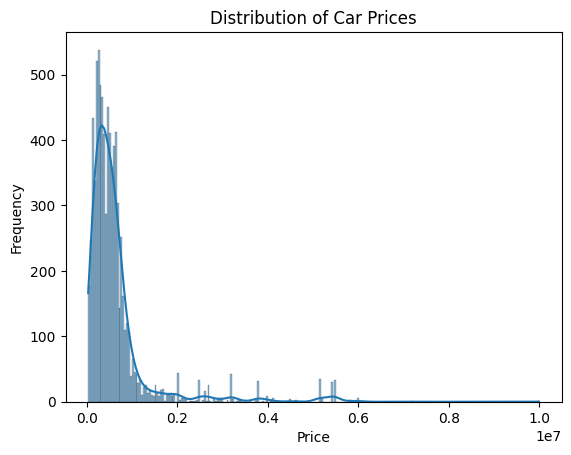

In [ ]:
sns.histplot(df.selling_price, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='selling_price', ylabel='Count'>

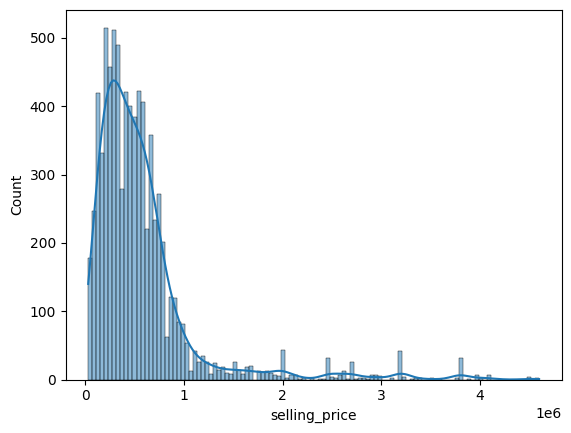

In [ ]:
# Long tail distribution needs to be handled
sns.histplot(df.selling_price[df.selling_price < 5000000], kde=True)

In [ ]:
np.log1p([0,1,10,1000,100000])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

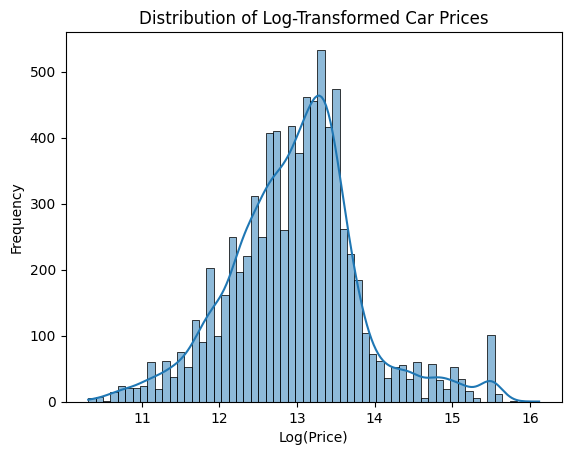

In [ ]:
# Apply log transformation to reduce long tail effect
price_in_log = np.log1p(df.selling_price)
sns.histplot(price_in_log, kde=True)
plt.title('Distribution of Log-Transformed Car Prices')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.show()

Before the log transformation, car prices are usually right-skewed (lots of cheaper cars, few very expensive ones).

After applying log(price), the distribution becomes much closer to normal (bell-shaped) distribution.

# 3 & 4. Feature Selection & Preprocessing

In [ ]:
df['log_price'] = np.log1p(df.selling_price)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,owner_num,mileage_num,engine_num,max_power_num,brand,log_price
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,1,23.40,1248.0,74.00,Maruti,13.017005
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2,21.14,1498.0,103.52,Skoda,12.821261
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,3,17.70,1497.0,78.00,Honda,11.970357
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,1,23.00,1396.0,90.00,Hyundai,12.323860
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,1,16.10,1298.0,88.20,Maruti,11.775297


In [ ]:
# Missing values for each column and sort descending
df.isnull().sum().sort_values(ascending=False)


engine           214
engine_num       214
mileage_num      214
seats            214
mileage          214
torque           214
max_power        208
max_power_num    208
brand              0
owner_num          0
name               0
year               0
owner              0
transmission       0
seller_type        0
fuel               0
km_driven          0
selling_price      0
log_price          0
dtype: int64

Engine, Mileage, Seats, Torque , Max Power has null values

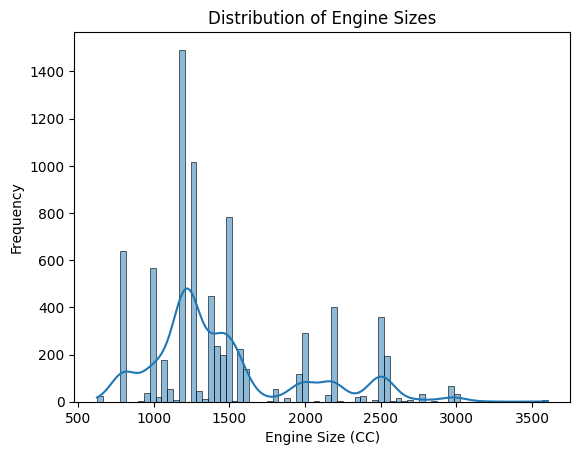

In [ ]:
# Checking distribution of null values in Engine column
sns.histplot(df['engine_num'].dropna(), kde=True)
plt.title('Distribution of Engine Sizes')
plt.xlabel('Engine Size (CC)')
plt.ylabel('Frequency')
plt.show()

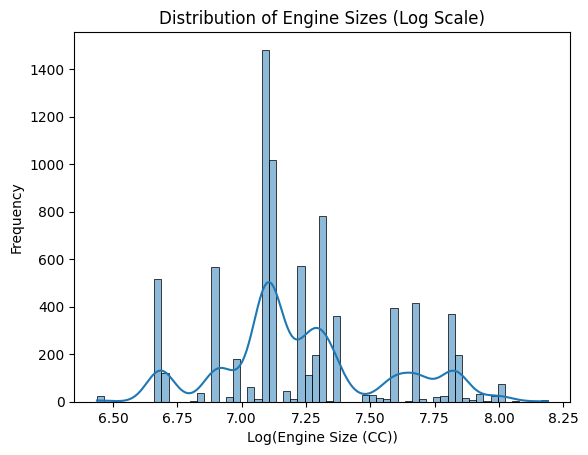

In [ ]:
# Checking distribution of null values in Engine column
sns.histplot(np.log1p(df['engine_num'].dropna()), kde=True)
plt.title('Distribution of Engine Sizes (Log Scale)')
plt.xlabel('Log(Engine Size (CC))')
plt.ylabel('Frequency')
plt.show()


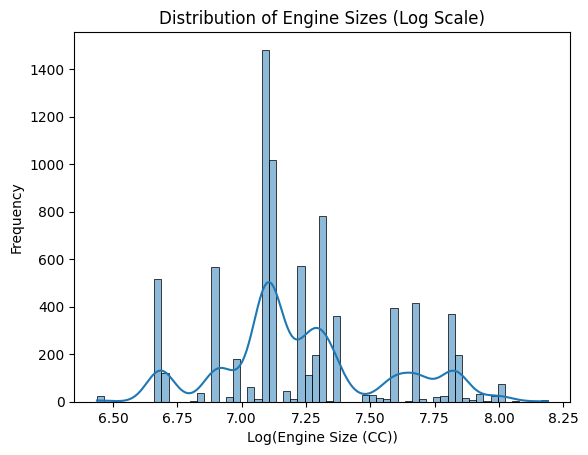

In [ ]:
sns.histplot(np.log1p(df['engine_num'].dropna()), kde=True) #skewed
plt.title('Distribution of Engine Sizes (Log Scale)')
plt.xlabel('Log(Engine Size (CC))')
plt.ylabel('Frequency')
plt.show()

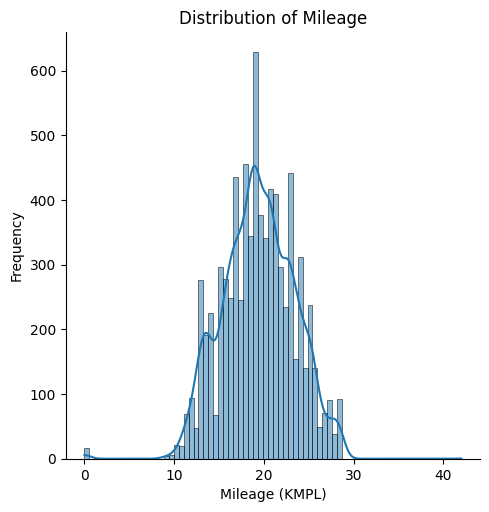

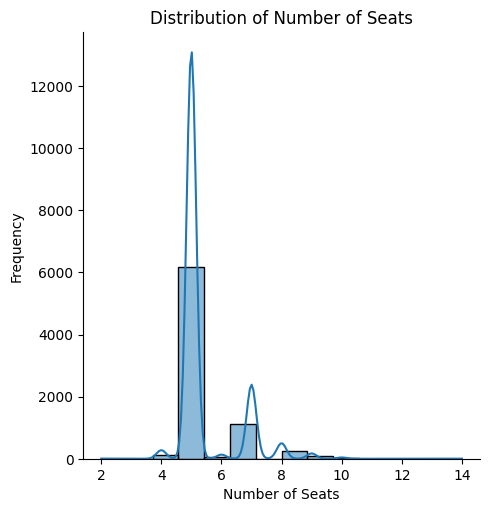

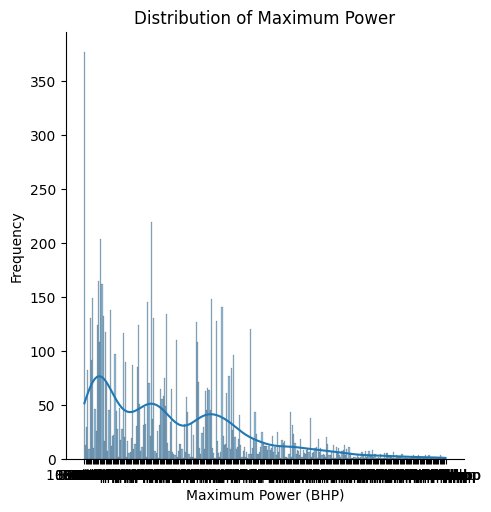

In [ ]:
sns.displot(data = df, x = 'mileage_num', kde=True) # normalized
plt.title('Distribution of Mileage')
plt.xlabel('Mileage (KMPL)')
plt.ylabel('Frequency')
plt.show()

sns.displot(data = df, x = 'seats', kde=True) #has long tail
plt.title('Distribution of Number of Seats')
plt.xlabel('Number of Seats')
plt.ylabel('Frequency')
plt.show()

sns.displot(data = df, x = 'max_power', kde=True) #has long tail
plt.title('Distribution of Maximum Power')
plt.xlabel('Maximum Power (BHP)')
plt.ylabel('Frequency')
plt.show()

# sns.displot(data = df, x = 'torque') # --- IGNORE ---

In [ ]:
# Distribution is skewed, check % of null values
df['engine_num'].isnull().sum() / len(df)

np.float64(0.02665670154459392)

In [ ]:
# The null values content is less than 10%, removing engine with null values
print(f"before removing null values:", df['engine_num'].isnull().sum())
df = df.dropna(subset=['engine_num'])
print(f"after removing null values:", df['engine_num'].isnull().sum())

before removing null values: 214
after removing null values: 0


In [ ]:
# Check if there are any remaining null values in the dataset
print("Total", df.isnull().sum().sum())
print(df.isnull().sum().sort_values(ascending=False))


Total 0
name             0
max_power        0
brand            0
max_power_num    0
engine_num       0
mileage_num      0
owner_num        0
seats            0
torque           0
engine           0
year             0
mileage          0
owner            0
transmission     0
seller_type      0
fuel             0
km_driven        0
selling_price    0
log_price        0
dtype: int64


In [ ]:
selected_columns = ['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner_num', 'mileage_num', 'engine_num', 'max_power_num', 'seats']
#selected df with remaned columns only
sdf = df[selected_columns].rename(columns={
    'owner_num': 'owner',
    'mileage_num': 'mileage',
    'engine_num': 'engine',
    'max_power_num': 'max_power'
})
sdf.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [ ]:
# expected rows after removing null values = 8028 - 214 = 7814
sdf.shape

(7814, 12)

# 5. Feature Selection (EDA continued)

Finding relationship of Xs with selling_price (here with log value of selling price)
1. **km_driven vs selling_price:** 
2. **year vs selling_price:** 
3. **engine vs selling_price:** 
4. **max_power vs selling_price:** 

<Axes: xlabel='year', ylabel='selling_price'>

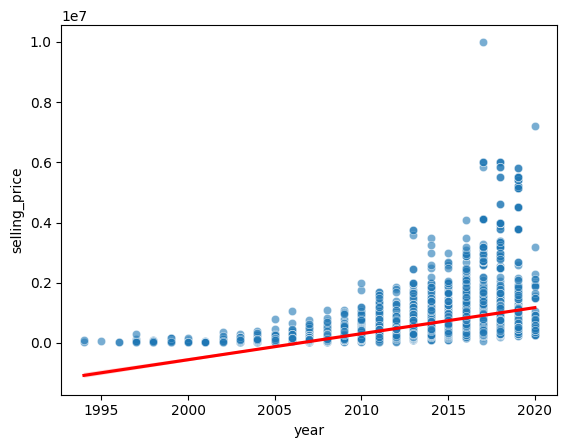

In [ ]:
# Visualizing the relationship between features and target variable
# All features = ['brand', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats']
# numerical_features = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']
selected_feature = 'year'
target_variable = 'selling_price'
sns.scatterplot(
        x=selected_feature,
        y=target_variable,
        data=sdf,
        alpha=0.6
    )
sns.regplot(
        x=selected_feature,
        y=target_variable,
        data=sdf,
        scatter=False,
        line_kws={"color": "red"}
    )
# Result is linear relationship

<Axes: xlabel='km_driven', ylabel='selling_price'>

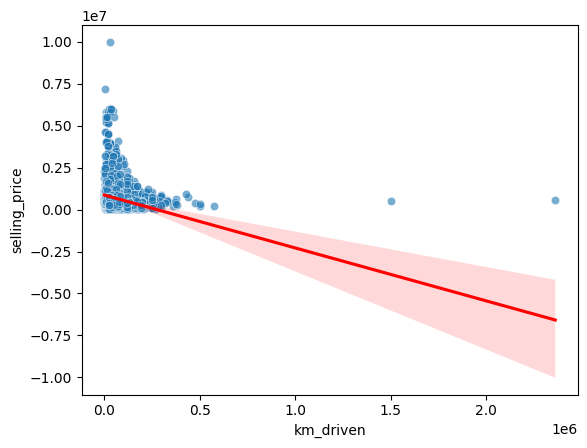

In [ ]:
# All features = ['brand', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats']
# numerical_features = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']
selected_feature = 'km_driven'
target_variable = 'selling_price'
sns.scatterplot(
        x=selected_feature,
        y=target_variable,
        data=sdf,
        alpha=0.6
    )
sns.regplot(
        x=selected_feature,
        y=target_variable,
        data=sdf,
        scatter=False,
        line_kws={"color": "red"}
    )

# Result is negative linear relationship, higher the km_driven, lower the selling_price

<Axes: xlabel='mileage', ylabel='selling_price'>

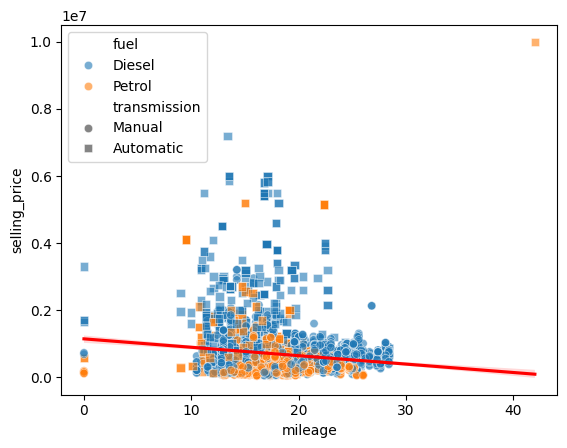

In [ ]:
# All features = ['brand', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats']
# numerical_features = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']
selected_feature = 'mileage'
target_variable = 'selling_price'
sns.scatterplot(
        x=selected_feature,
        y=target_variable,
        data=sdf,
        alpha=0.6,
        hue='fuel',
        style='transmission',
        markers=['o', 's']
    )
sns.regplot(
        x=selected_feature,
        y=target_variable,
        data=sdf,
        scatter=False,
        line_kws={"color": "red"}
    )


### Observations:
1. As the kilometres driven increases, the selling price tends to decrease, showing a negative correlation between these variables.
2. The variance in price is not constant across different kilometre values - there's more price variability among lower-kilometre cars than higher-kilometre cars.
3. There appears to be some clustering of data points, particularly in the lower kilometre ranges, suggesting price is affected by other factors such as brand, model, and year of manufacture.
4. There are some outliers visible - particularly some high-priced cars despite relatively high kilometre readings, which might represent luxury or collector vehicles.

In [ ]:
# label encoder for non numeric values
# All features = ['brand', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats']
from sklearn.preprocessing import LabelEncoder

non_numeric_cols = ['brand', 'fuel', 'seller_type', 'transmission']
le = LabelEncoder()
for col in non_numeric_cols:
    sdf[col] = le.fit_transform(sdf[col])  


<Axes: >

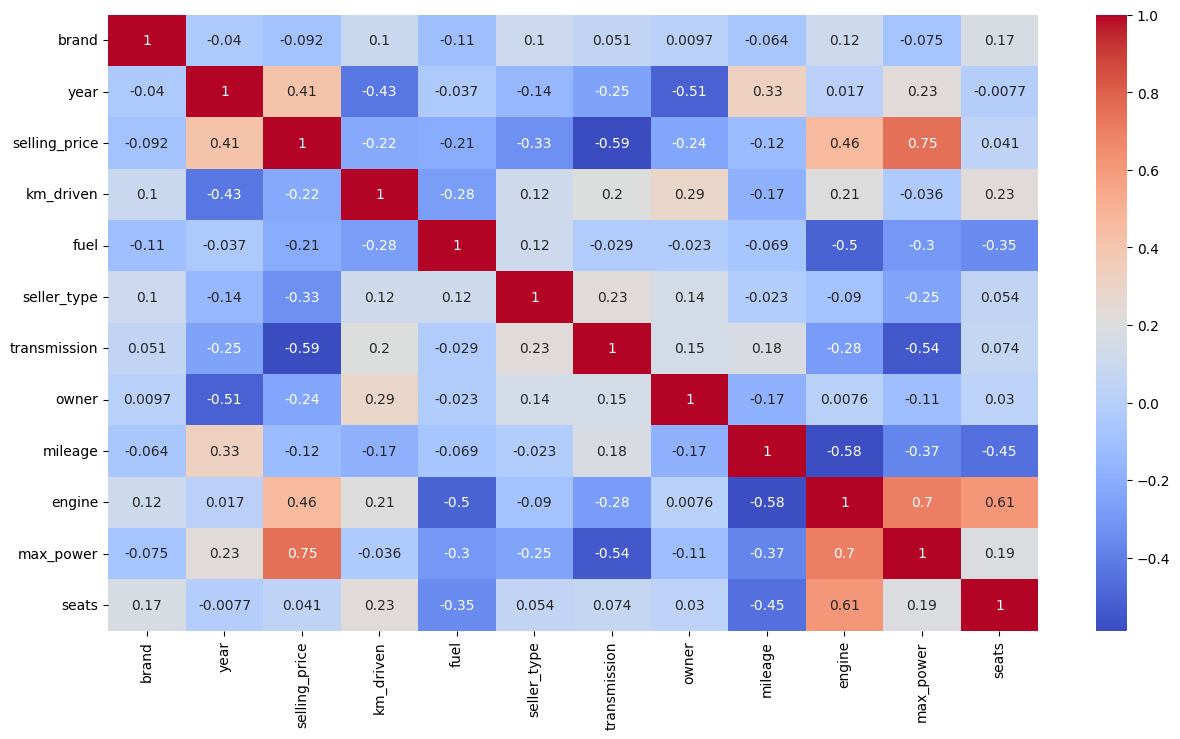

In [ ]:
# Check heatmap
plt.figure(figsize = (15,8))
sns.heatmap(sdf.corr(), annot=True, cmap="coolwarm")


Heatmap infers that selling_price (following log_price) has strong corellation with features **max_power, year and engine** in descending order


In [ ]:
# Feature Selection:
# Target or y or dependent variable or label
y = sdf["selling_price"]
# Perform log scaling to speed up model training
y = np.log(sdf['selling_price'])
# Independent variables, or X or features or predictors or explanatory variables
X = sdf[['max_power', 'year', 'engine']]

y.head()

0    13.017003
1    12.821258
2    11.970350
3    12.323856
4    11.775290
Name: selling_price, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets in a 70-30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.isna().sum()
X_train.isna().sum()

max_power    0
year         0
engine       0
dtype: int64

# 6. Model Selection - Linear Regresssion
 During inference/testing, you have to transform your predicted y backed before comparing with y
test, i.e.,

In [ ]:
n = len(sdf)
n_test = int(0.3 * n)  # 30% for validation
n_train = int(0.7 * n)  # 70% for test
n, n_train, n_test

(7814, 5469, 2344)

In [ ]:
#importing all the regression models
from sklearn.linear_model import LinearRegression 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#our models and their names in the two lists respectively
algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state = 0), 
              RandomForestRegressor(n_estimators = 100, random_state = 0)]

algorithm_names = ["Linear Regression", "SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

train_mse = []
test_mse = []

# Use KFold and split into 5 subsets , and 1 will be used as validation set
kfold = KFold(n_splits=5, shuffle=True)

for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithm_names[i]:<25} - Score: {scores}; Neg Mean: {scores.mean()}")

#since we are using NMSE, smaller number is better and thus the best model shown below is Random Forest Regression Model of = -0.00033 value 

Linear Regression         - Score: [-0.10985601 -0.09888563 -0.09878896 -0.10557431 -0.09335027]; Neg Mean: -0.10129103589045704
SVR                       - Score: [-0.30177117 -0.30065551 -0.31104306 -0.31192531 -0.28940013]; Neg Mean: -0.3029590358224178
KNeighbors Regressor      - Score: [-0.06362726 -0.0618977  -0.0644536  -0.06154864 -0.06586625]; Neg Mean: -0.0634786889852967
Decision-Tree Regressor   - Score: [-0.05491522 -0.06525054 -0.05391339 -0.07743524 -0.0640626 ]; Neg Mean: -0.06311539786367015
Random-Forest Regressor   - Score: [-0.05611629 -0.04580121 -0.05140072 -0.05364947 -0.0574703 ]; Neg Mean: -0.05288759749196968


In [ ]:
#Find the best Random-Forest Regressor model

from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

rf = RandomForestRegressor(random_state = 42)

grid = GridSearchCV(estimator = rf, 
                    param_grid = param_grid, 
                    cv = kfold, 
                    n_jobs = -1, 
                    return_train_score=True, 
                    refit=True,
                    scoring='neg_mean_squared_error')

# Fit your grid_search
grid.fit(X_train, y_train);  #fit means start looping all the possible parameters

Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 295, in main
    raise ValueError(
        f'Cannot register {name} for automatic cleanup: '
        f'unknown resource type {rtype}')
ValueError: Cannot register /var/folders/_9/r8g_8hv9515fj7v_lqlxmlm80000gn/T/joblib_memmapping_folder_45645_2b52f1997047412e9c7fde158cd57f48_8949157f05ca4031be47db813f94dc10 for automatic cleanup: unknown resource type folder
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 295, in main
    raise ValueError(
        f'Cannot register {name} for automatic cleanup: '
        f'unknown resource type {rtype}')
ValueError: Cannot register /loky-45645-eys9twbm for automatic cleanup: unknown resource type semlock
Traceback (most recent call last):
 

In [ ]:
# Use the best model to predict on test set
grid.best_params_
best_mse = grid.best_score_
print("The best NMSE that we can get with Random Forest is:", best_mse)


The best NMSE that we can get with Random Forest is: -0.053335730217007216


# 7. Testing

In [ ]:
yhat = grid.predict(X_test)
print("Thus, our model's NMSE score when applied on the test dataset is:", mean_squared_error(y_test, yhat))

Thus, our model's NMSE score when applied on the test dataset is: 0.047598561267300624


# 8. Analysis

In [ ]:
#in ML some algorithms give better feature importance after the model is fitted which is in best_estimator_
rf = grid.best_estimator_
rf.feature_importances_

array([0.49901723, 0.39040549, 0.11057728])

<BarContainer object of 3 artists>

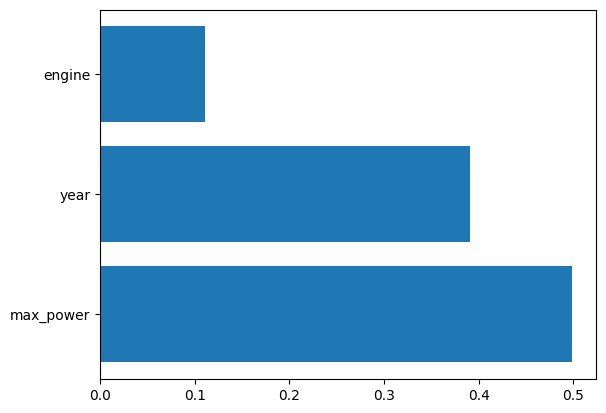

In [ ]:
#plotting the weight in graph
plt.barh(X.columns, rf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

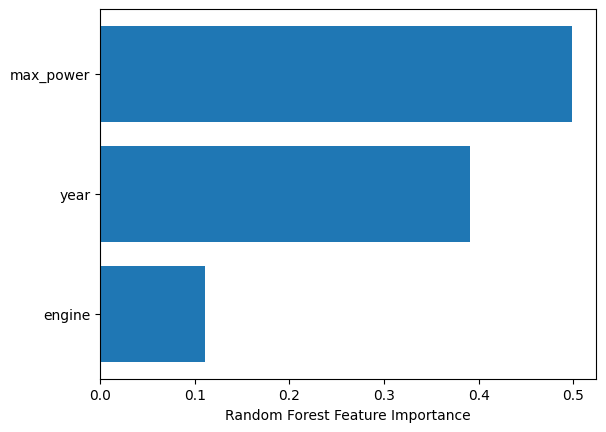

In [ ]:
#sorting them for better view in ascending order of y-axis
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Text(0.5, 0, 'Random Forest Feature Importance')

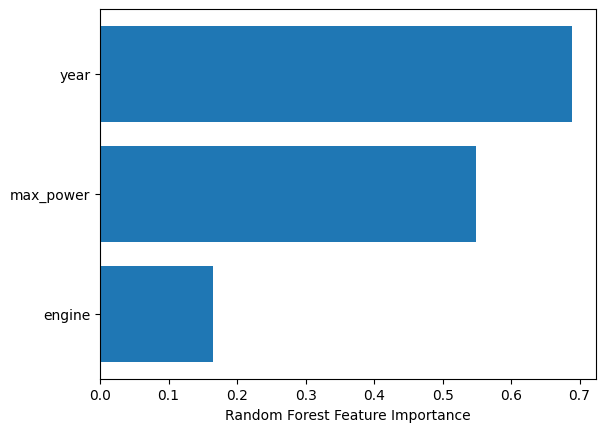

In [ ]:
# Finding out which features impact the model the most via permutation way

from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(rf, X_test, y_test)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [ ]:
# Utilizing shap method this way around
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

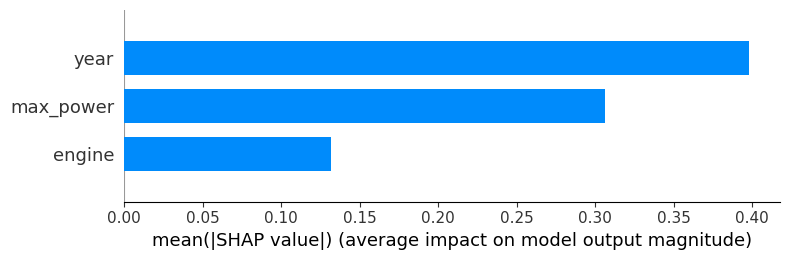

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names = X.columns)

Max_power has highest correlation with selling_price previously, however year has highest correlation score of ~0.030. The ordering has been changed as
year (~0.032), max_power (~0.023) and engine (~0.01)

# 9. Inference

In [ ]:
#saving model to folder before using it for inference for later use
import pickle

filename = 'models/a1_predict_car_price.model'
pickle.dump(grid, open(filename, 'wb'))

In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
#Take one sample
sdf[['max_power', 'year', 'engine', 'selling_price']].loc[1]

max_power           103.52
year               2014.00
engine             1498.00
selling_price    370000.00
Name: 1, dtype: float64

In [ ]:
sample = np.array([[103.52, 2014.0, 1498.00]])

In [ ]:
pred_y = loaded_model.predict(sample)
print(pred_y)
pred_y = np.exp(pred_y)  #reverting the logarithmic scaling
print("The predicted selling price of the inputed sample car is: ", pred_y)
print("The actual selling price of the car in question is: ", sdf['selling_price'].loc[1])

[13.03929691]
The predicted selling price of the inputed sample car is:  [460144.98802038]
The actual selling price of the car in question is:  370000


# Task 2. Report  
In the end of the notebook, please write a 2-3 paragraphs summary deeply discussing and analysing the results. 
 Possible points of discussion: <br>
 **• Which features are important? Which are not? Why?** <br>

Based on the analysis, the most important features for predicting car prices are year, max_power, and engine. This is supported by both correlation analysis and feature importance scores from the Random Forest model and permutation importance.

- Year is the strongest predictor, likely because newer cars tend to have higher prices.
- Max_power and engine size also contribute significantly, as they reflect the car’s performance and specifications.
- Other features like brand, fuel type, and owner are less important in this model, possibly because their effects are either captured indirectly by the main features or have less direct impact on price.


**• Which algorithm performs well? Which does not? Why? (here, you haven’t learned about any algorithms yet, but you can search online a bit and start building an intuition)** <br>

Among the tested algorithms, Random Forest Regressor performed best, achieving the lowest negative mean squared error (NMSE) in cross-validation. <br>

Random Forest works well because it can capture non-linear relationships and interactions between features.
Simpler models like Linear Regression may not perform as well due to the complex nature of car price prediction.
Algorithms like SVR, KNeighbors, and Decision Tree were also tested, but Random Forest’s ensemble approach provided better generalization and accuracy. <br>
